In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class FullyConnectedLayer:
    
    def __init__ (self, name, n_in, n_out, learning_rate):
        '''
        name: Name of this later. Choose any string that uniquely identifies this layer
        n_in: number of inputs
        n_out: number of outputs
        learning_rate: learning rate
        '''
        self.weights = np.random.uniform(low=-0.5, high=0.5, size=(n_in,n_out))
        self.bias = np.random.uniform(low=-0.5, high=0.5, size=(1,n_out))
        self.name = name
        
    def print_self (self):
        print "Layer: " + self.name
        print "Weights"
        print self.weights
        print "Bias"
        print self.bias
        
    def get_parameters(self):
        return self.weights, self.bias
    
    def get_layer_type(self):
        return "fully_connected"
    
    def forward_pass(self, input_vector):
        self.input_vector = input_vector
        return np.matmul(input_vector, self.weights) + self.bias
    
    def _compute_gradient_weights(self, error_upper_layer):
        grad_weights = np.zeros_like(self.weights)
        # For every i/o pair
        for i, o in zip(self.input_vector, error_upper_layer):
            grad_weights = grad_weights + np.outer(i, o)
        return grad_weights
    
    def _compute_error_lower_layer(self, error_upper_layer):
        return np.matmul(error_upper_layer, self.weights.transpose())
    
    def _compute_error_bias(self, error_upper_layer):
        return np.sum(error_upper_layer, 0)
    
    def backward_pass(self, error_upper_layer):
        # Compute error for upper layer
        error_lower_layer = self._compute_error_lower_layer(error_upper_layer) 
        # Compute gradients on weights
        grad_weights = self._compute_gradient_weights(error_upper_layer)
        # Compute gradients on bias
        grad_bias = self._compute_error_bias(error_upper_layer)
        # Adjust weights and bias just a little bit in direction to opposite to the gradient to minimize loss
        self.weights = self.weights - learning_rate * grad_weights
        self.bias = self.bias - learning_rate * grad_bias
        # return error
        return error_lower_layer

In [3]:
class EuclideanLossLayer:
    
    def __init__(self, name):
        self.name = name
    
    def forward_pass(self, input_vector):
        self.input_vector = input_vector
        return self.input_vector
    
    def get_parameters(self):
        return None

    def get_layer_type(self):
        return "euclidean_loss"
    
    def print_self (self):
        print "Layer: " + self.name
        print "No learned parameters in this layer"
        pass
        
    def backward_pass(self, expected_output):
        #print "Loss: " + str(np.sum(np.square(expected_output-self.input_vector)))
        return -2*(expected_output-self.input_vector)

In [4]:
class NeuralNetwork:
    
    def __init__(self):
        self.layers = []
    
    def add_layer(self, layer):
        self.layers.append(layer)
        
    def print_self (self):
        for layer in self.layers:
            layer.print_self()
            
    def get_layers (self):
        return self.layers
        
    def forward_pass(self, input_vector):
        data = input_vector
        for layer in self.layers:
            data = layer.forward_pass(data)
            
    def backward_pass(self, expected_output):
        data = expected_output
        for layer in reversed(self.layers):
            data = layer.backward_pass(data)
            
    def train(self, num_iterations, input_vector, expected_output):
        for i in range(num_iterations):
            #print "Iteration " + str(i) + " of " + str(num_iterations)
            self.forward_pass(input_vector)
            self.backward_pass(expected_output)

In [5]:
# Define constats
learning_rate = 0.0001
n_in = 1
n_out = 1

# Construct a NN
nn = NeuralNetwork()
nn.add_layer(FullyConnectedLayer("layer 1", n_in, n_out, learning_rate))
nn.add_layer(EuclideanLossLayer("l2_loss"))


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


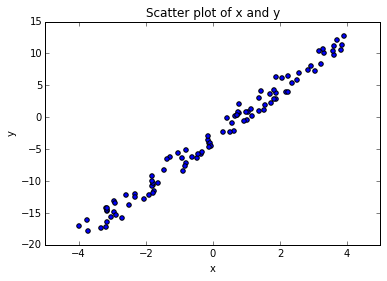

In [6]:
# define i/o
def generate_random_points_along_a_line (slope, intercept, num_points, abs_value, abs_noise):
    # randomly select x
    x = np.random.uniform(low=-abs_value, high=abs_value, size=(num_points,n_in))
    # y = mx + b + noise
    y = slope*x + intercept + np.random.uniform(low=-abs_noise, high=abs_noise, size=(num_points,n_out))
    return x, y

def plot_points(x,y):
    plt.scatter(x, y)
    plt.title('Scatter plot of x and y')
    plt.xlabel('x')
    plt.ylabel('y')
    
slope = 4
intercept = -3
num_points = 100
abs_value = 4
abs_noise = 2
x, y = generate_random_points_along_a_line (slope, intercept, num_points, abs_value, abs_noise)
plot_points(x, y)

In [7]:
num_iterations = 1000
input_vector = x
expected_output = y

nn.train(num_iterations, input_vector, expected_output)
nn.print_self()

Layer: layer 1
Weights
[[ 3.85846427]]
Bias
[[-3.2957834]]
Layer: l2_loss
No learned parameters in this layer


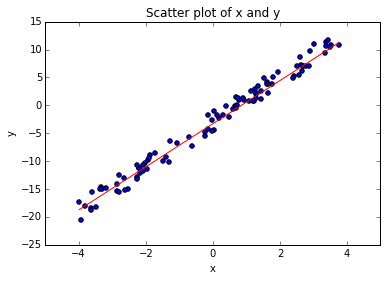

In [8]:
x, y = generate_random_points_along_a_line (slope, intercept, num_points, abs_value, abs_noise)
plot_points(x, y)
xval = np.linspace(np.amin(x), np.amax(x), num=len(x))

# Get FC layer parameters - 0th layer in nn.
weights, bias = nn.get_layers()[0].get_parameters()

# Visualize the line using the weight and bias
plt.plot(xval, xval*weights[0] + bias[0], 'r')
plt.show()